In [1]:
#!pip install networkx==2.5

In [2]:
#!pip install tqdm

In [3]:
from tqdm import tqdm

In [4]:
import sage.all
import numpy as np

In [5]:
import networkx as nx

In [6]:
from sage.graphs.generators.random import RandomIntervalGraph

In [7]:
#Generates Chordal Graphs and converts them into networkx object
np.set_printoptions(suppress=True)
def generate_chordal(start, end, step):
    graphs = []
    total=(np.floor(end/step).astype(int))
    properties = []
    avg_degree=0
    avg_density=0
    num_of_nodes=start
    for i in tqdm(range(total)):
        T = RandomIntervalGraph(num_of_nodes
                              )
        ng = T.networkx_graph()
        if (nx.is_connected(ng)):
            #nx.draw(ng)
            graphs.append(ng)
            val = np.array([num_of_nodes, ng.number_of_edges(), average_degree(ng), nx.density(ng)])
            properties.append(val)
            avg_degree+=average_degree(ng)
            avg_density+=nx.density(ng)
            num_of_nodes+=step
    return graphs, properties,avg_degree/len(graphs),avg_density/len(graphs)

In [8]:
def average_degree(G):
    sum_of_degrees=sum(dict(G.degree).values())
    num_of_nodes=G.number_of_nodes()
    avg_degree=sum_of_degrees/num_of_nodes
    return avg_degree

In [ ]:
graphs, properties,avg_degree,avg_density = generate_chordal(1990, 1000, 5) #start, end, step
print(avg_degree)
print(avg_density)

 16%|█▌        | 32/200 [02:12<12:17,  4.39s/it]

In [11]:
len(graphs)

397

[  55.         1153.           41.92727273    0.77643098]


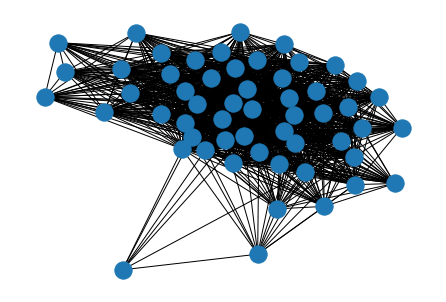

In [12]:
nx.draw(graphs[10])
print(properties[10])

In [14]:
import pickle

In [15]:
with open("interval_graphs_first_400(step_5).pkl", "wb") as fp:
    pickle.dump(graphs, fp)
with open("interval_properties_first_400(step_5).pkl", "wb") as fp:
    pickle.dump(properties, fp)